In [1]:
#import libs and tools
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [5]:
color = sns.color_palette()
print('Please wait. Importing data...')
df = pd.read_excel('C:/Users/ThinkPad/Desktop/Masterarbeit/NO2_2019.xlsx',header=0,encoding='utf-8')
print('import completed.')

#def date_parser(x):
#    return datetime.strptime(x, "%d.%m.%Y %H:%M")
df[['date','time']] = df['Zeitpunkt'].str.split(expand=True)
df['datetime'] = (pd.to_datetime(df.pop('date'), format='%d.%m.%Y') + 
                  pd.to_timedelta(df.pop('time') + ':00'))
print (df)




Please wait. Importing data...
import completed.
             Zeitpunkt Andechs/Rothenfeld Ansbach/Residenzstraße  \
0     01.01.2019 01:00                  5                     25   
1     01.01.2019 02:00                  6                     20   
2     01.01.2019 03:00                  5                     17   
3     01.01.2019 04:00                  5                     16   
4     01.01.2019 05:00                  5                     14   
...                ...                ...                    ...   
8755  31.12.2019 20:00                 16                     34   
8756  31.12.2019 21:00                 16                     35   
8757  31.12.2019 22:00                 20                     48   
8758  31.12.2019 23:00                 23                     42   
8759  31.12.2019 24:00                 24                     36   

     Aschaffenburg/Bussardweg Augsburg/Bourges-Platz Augsburg/Karlstraße  \
0                          26                     30      

In [6]:

data = df[['datetime', 'Augsburg/Königsplatz']]
#data['date'] = data['Zeitpunkt'].map(lambda x: date_parser(x))
data['no2']=data['Augsburg/Königsplatz']
print(data)
data.no2.describe()

                datetime Augsburg/Königsplatz no2
0    2019-01-01 01:00:00                   28  28
1    2019-01-01 02:00:00                   19  19
2    2019-01-01 03:00:00                   18  18
3    2019-01-01 04:00:00                   15  15
4    2019-01-01 05:00:00                   10  10
...                  ...                  ...  ..
8755 2019-12-31 20:00:00                   57  57
8756 2019-12-31 21:00:00                   47  47
8757 2019-12-31 22:00:00                   35  35
8758 2019-12-31 23:00:00                   41  41
8759 2020-01-01 00:00:00                   41  41

[8760 rows x 3 columns]


count     8760
unique     107
top         15
freq       345
Name: no2, dtype: int64

                               datetime   no2
datetime                                     
2019-01-01 01:00:00 2019-01-01 01:00:00  28.0
2019-01-01 02:00:00 2019-01-01 02:00:00  19.0
2019-01-01 03:00:00 2019-01-01 03:00:00  18.0
2019-01-01 04:00:00 2019-01-01 04:00:00  15.0
2019-01-01 05:00:00 2019-01-01 05:00:00  10.0


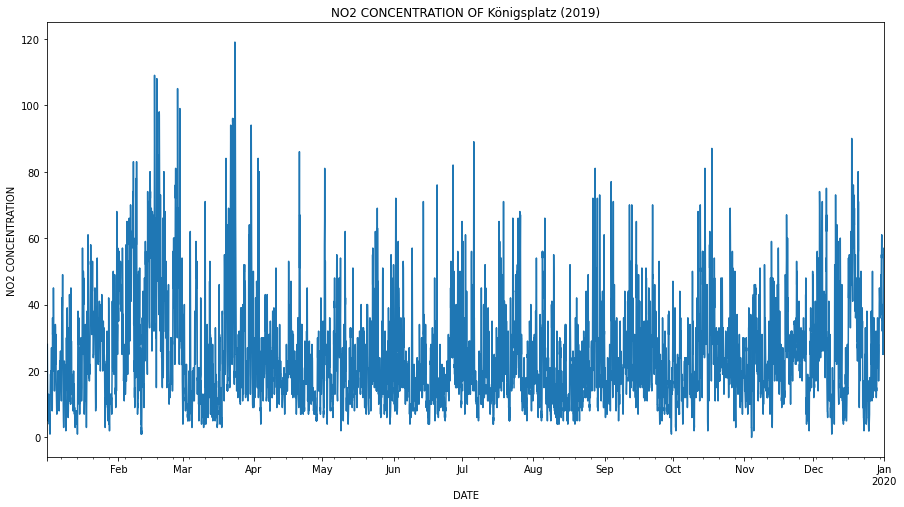

In [8]:
data=data[['datetime','no2']]
data['no2'] = data['no2'].map(lambda x: str(x))
data['no2'] = pd.to_numeric(data['no2'],errors='coerce')
data.index = data['datetime']
#data['datetime'] = pd.to_datetime(data['datetime'])
#data.set_index('datetime')
#data['data.apply(pd.to_numeric)'] = pd.to_numeric(data['pm10'])
print(data.head())
data.no2.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("NO2 CONCENTRATION")
plt.title("NO2 CONCENTRATION OF Königsplatz (2019)")
plt.show()


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 01:00:00 to 2020-01-01 00:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  8760 non-null   datetime64[ns]
 1   no2       8742 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 205.3 KB


D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1606      0.049     -3.284      0.001      -0.256      -0.065
ma.L1          0.3087      0.048      6.410      0.000       0.214       0.403
ar.S.L12       0.9973      0.001    999.567      0.000       0.995       0.999
ma.S.L12      -0.9777      0.003   -341.637      0.000      -0.983      -0.972
sigma2        39.9782      0.301    132.823      0.000      39.388      40.568


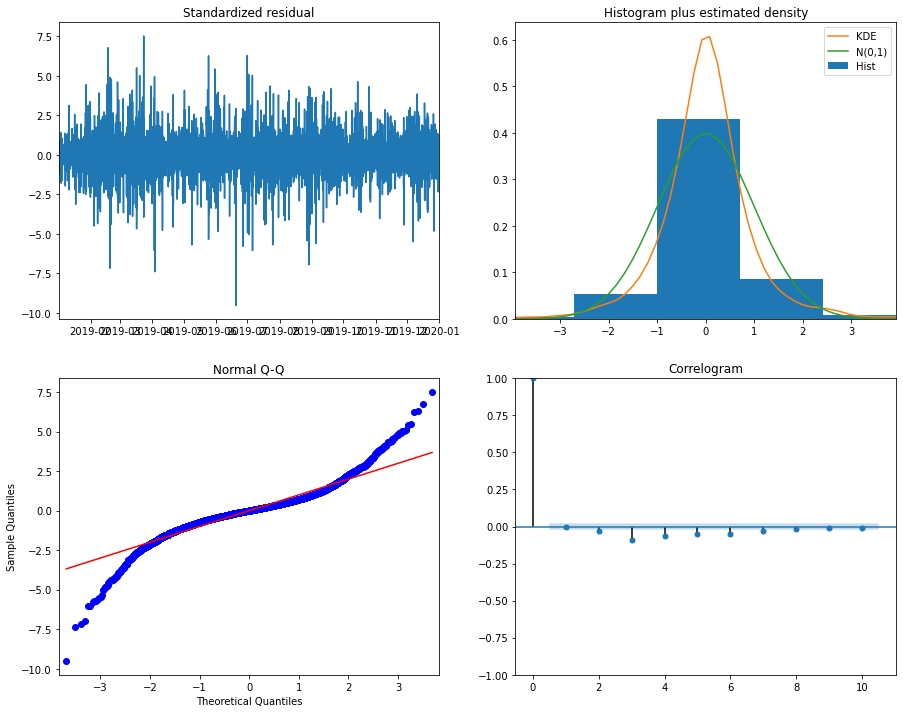

In [10]:
mod = sm.tsa.statespace.SARIMAX(data.no2,
order=(1, 1, 1),
seasonal_order=(1, 0, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The Root Mean Squared Error of our prediction is 5.66
2020-01-01 01:00:00    38.543794
2020-01-01 02:00:00    38.226470
2020-01-01 03:00:00    37.665378
2020-01-01 04:00:00    38.415836
2020-01-01 05:00:00    41.366041
2020-01-01 06:00:00    43.934747
2020-01-01 07:00:00    45.561581
2020-01-01 08:00:00    46.128504
2020-01-01 09:00:00    45.854061
2020-01-01 10:00:00    43.097514
2020-01-01 11:00:00    41.773828
2020-01-01 12:00:00    41.005733
2020-01-01 13:00:00    38.862596
2020-01-01 14:00:00    38.496931
2020-01-01 15:00:00    37.945271
2020-01-01 16:00:00    38.692414
2020-01-01 17:00:00    41.634784
2020-01-01 18:00:00    44.196458
2020-01-01 19:00:00    45.818864
2020-01-01 20:00:00    46.384241
2020-01-01 21:00:00    46.110547
2020-01-01 22:00:00    43.361511
2020-01-01 23:00:00    42.041432
2020-01-02 00:00:00    41.275429
Freq: H, dtype: float64


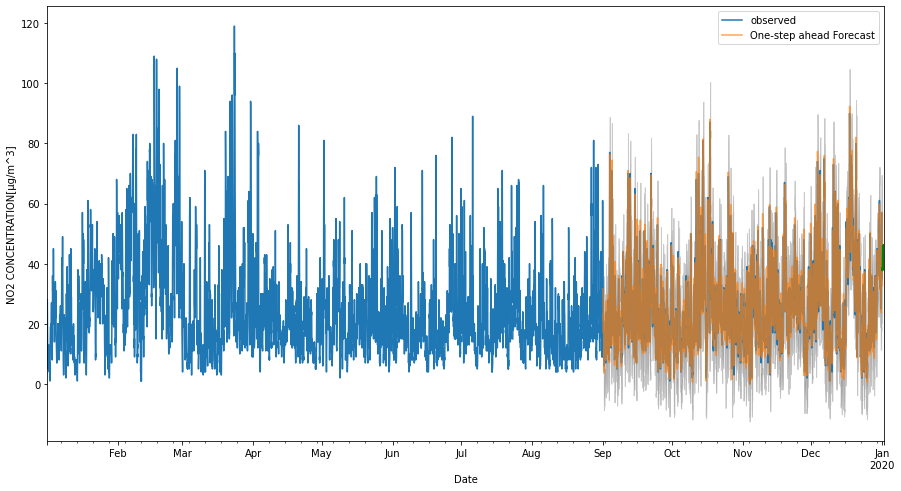

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2019-09-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data.no2['2019-01':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO2 CONCENTRATION[μg/m^3]')
plt.legend()
no2_forecasted = pred.predicted_mean
no2_truth = data.no2['2019-09-01':]
# Compute the mean square error
rmse = (((no2_forecasted - no2_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))
forecast = results.forecast(24)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')


In [23]:
accuracy =1-abs((no2_forecasted - no2_truth)/no2_truth)

print(accuracy)


2019-09-01 00:00:00    0.825967
2019-09-01 01:00:00    0.975638
2019-09-01 02:00:00    0.887911
2019-09-01 03:00:00    0.958661
2019-09-01 04:00:00    0.704374
                         ...   
2019-12-31 20:00:00    0.975359
2019-12-31 21:00:00    0.784713
2019-12-31 22:00:00    0.774572
2019-12-31 23:00:00    0.795202
2020-01-01 00:00:00    0.985212
Freq: H, Length: 2929, dtype: float64


In [25]:
where_are_nan = np.isnan(accuracy)
where_are_inf = np.isinf(accuracy)
accuracy[where_are_inf]=0
accuracy[where_are_nan]=0
print(accuracy.mean())

0.8122254811779115


2020-01-01 01:00:00    38.543794
2020-01-01 02:00:00    38.226470
2020-01-01 03:00:00    37.665378
2020-01-01 04:00:00    38.415836
2020-01-01 05:00:00    41.366041
2020-01-01 06:00:00    43.934747
2020-01-01 07:00:00    45.561581
2020-01-01 08:00:00    46.128504
2020-01-01 09:00:00    45.854061
2020-01-01 10:00:00    43.097514
2020-01-01 11:00:00    41.773828
2020-01-01 12:00:00    41.005733
2020-01-01 13:00:00    38.862596
2020-01-01 14:00:00    38.496931
2020-01-01 15:00:00    37.945271
2020-01-01 16:00:00    38.692414
2020-01-01 17:00:00    41.634784
2020-01-01 18:00:00    44.196458
2020-01-01 19:00:00    45.818864
2020-01-01 20:00:00    46.384241
2020-01-01 21:00:00    46.110547
2020-01-01 22:00:00    43.361511
2020-01-01 23:00:00    42.041432
2020-01-02 00:00:00    41.275429
Freq: H, dtype: float64


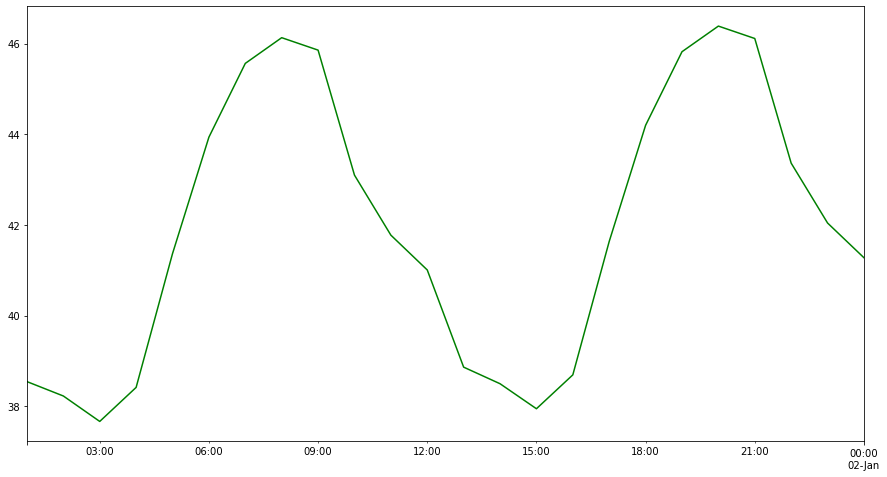

In [16]:
forecast = results.forecast(24)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')